In [1]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 6,3
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
players = pd.read_csv('Players.csv')
player_data = pd.read_csv('player_data.csv')
season_stat = pd.read_csv('Seasons_Stats.csv')

In [3]:
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


### Убедимся что рост и вес игроков имеют нормальное распределение
используем для этого гистограмму 

In [4]:
players.groupby(['height']).agg(['count'])['Player']

,count
height,
160.0,1
165.0,1
168.0,1
170.0,3
173.0,2
175.0,9
178.0,35
180.0,50
183.0,116


In [5]:
players.weight.unique()

array([ 77.,  83.,  86.,  88.,  79.,  90.,  95., 102.,  97.,  81.,  92.,
       106.,  99.,  70.,  74.,  85.,  72.,  89.,  98., 108., 107., 103.,
        78.,  96.,  87.,  80.,  76., 104., 111., 100.,  nan,  94.,  84.,
        73., 105., 101., 124., 112., 113.,  93., 120.,  68., 115.,  82.,
       127.,  91., 117., 109., 114.,  60., 116.,  61., 110.,  63.,  69.,
       129., 147., 122., 118., 137., 149., 126., 119., 136., 128., 131.,
       125., 142.,  75., 133., 121., 140., 138., 123., 130., 139., 163.])

In [6]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 8 columns):
Unnamed: 0     3922 non-null int64
Player         3921 non-null object
height         3921 non-null float64
weight         3921 non-null float64
collage        3573 non-null object
born           3921 non-null float64
birth_city     3452 non-null object
birth_state    3439 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 245.2+ KB


In [9]:
players_weight = players[['weight','Player']].groupby('weight').count()
players_height = players[['height','Player']].groupby('height').count()
players_weight.rename(columns= {'Player': 'Weight_Count'}, inplace= True)
players_height.rename(columns = {'Player':'Height_Count'}, inplace = True)

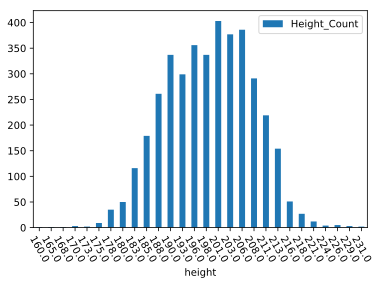

In [13]:
players_height.plot(kind = 'bar', rot=300)
# честно говоря не нашёл, как сделать красивее отображение значению по X, видимо только через pd.cut 

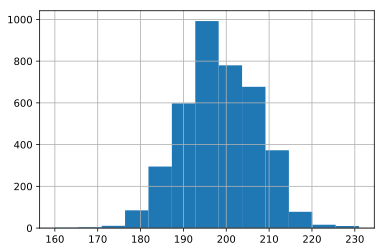

In [14]:
players.height.hist(bins=13)

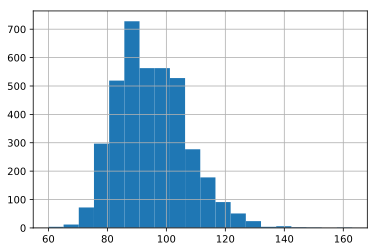

In [15]:
players.weight.hist(bins=20)

In [16]:
import seaborn as sns

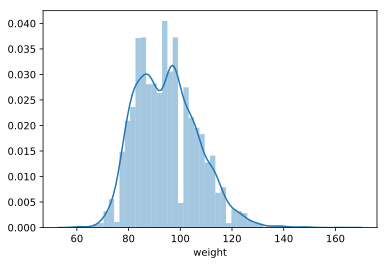

In [19]:
%config InlineBackend.figure_format = 'svg' 
sns.distplot(players.weight);

### проверим, что показатели роста и веса коррелируют друг с другом

In [20]:
players['weight'].fillna(players['weight'].mean() , inplace=True)
players['height'].fillna(players['height'].mean(), inplace=True)

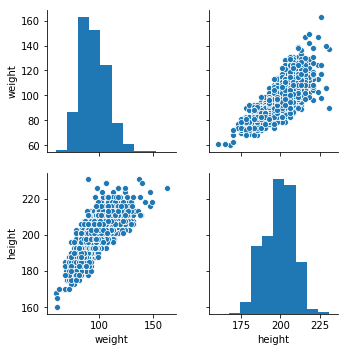

In [21]:
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    players[['weight','height']]);

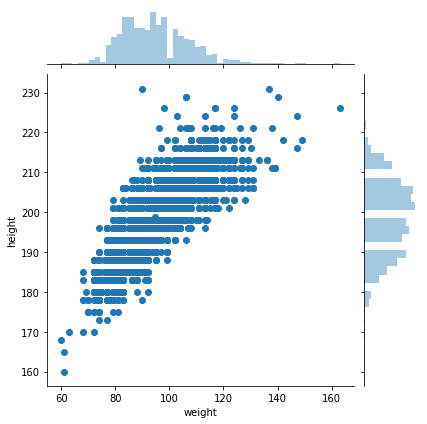

In [22]:
sns.jointplot(x='weight', y='height', 
              data=players, kind='scatter');

#### как и ожидалось наблюдаем положительную корреляцию между ростом и весом

### проверим, есть ли какая-то закономерность между штатом происхождения игрока и его успешностью
##### в качестве успешности за всю карьеру возьмём оценку по PTS - points scored. Знатоки баскетбола уверяют, что успешность объективнее оценивать по True Shooting%, но он не аддитивный, а все игроки играли не один сезон и не за одну команду, поэтому попробуем упростить

In [23]:
player_pts = season_stat.groupby('Player').sum()['PTS'].reset_index()

In [24]:
joined_players = player_pts.merge(players, on='Player', how='left').sort_values('PTS', ascending = False)

In [25]:
joined_players.head(30)

,Player,PTS,Unnamed: 0,height,weight,collage,born,birth_city,birth_state
2184,Kareem Abdul-Jabbar*,38387.0,789,218.0,102.0,"University of California, Los Angeles",1947.0,New York,New York
2186,Karl Malone*,36928.0,1737,206.0,113.0,Louisiana Tech University,1963.0,Summerfield,Louisiana
3883,Wilt Chamberlain*,33953.0,494,216.0,124.0,University of Kansas,1936.0,Philadelphia,Pennsylvania
2316,Kobe Bryant,33643.0,2456,198.0,96.0,NaN,1978.0,Philadelphia,Pennsylvania
2684,Michael Jordan*,32292.0,1675,198.0,88.0,University of North Carolina,1963.0,Brooklyn,New York
1228,Eddie Johnson,31852.0,1258,203.0,92.0,Tennessee State University,1944.0,Atlanta,Georgia
1078,Dirk Nowitzki,30260.0,2626,213.0,111.0,NaN,1978.0,Wurzburg,Germany
3394,Shaquille O'Neal*,29428.0,2222,216.0,147.0,Louisiana State University,1972.0,Newark,New Jersey
2403,LeBron James,28787.0,2944,203.0,113.0,NaN,1984.0,Akron,Ohio
1085,Dominique Wilkins*,28591.0,1588,201.0,90.0,University of Georgia,1960.0,Paris,France


In [26]:
joined_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3921 entries, 2184 to 1619
Data columns (total 9 columns):
Player         3921 non-null object
PTS            3921 non-null float64
Unnamed: 0     3921 non-null int64
height         3921 non-null float64
weight         3921 non-null float64
collage        3573 non-null object
born           3921 non-null float64
birth_city     3452 non-null object
birth_state    3439 non-null object
dtypes: float64(4), int64(1), object(4)
memory usage: 306.3+ KB


Заполнен birth_state  не очень хорошо, но для топовых игроков в основном указан, поэтому удалим строки у которых штат отсутствует

In [28]:
joined_players = joined_players[joined_players['birth_state'].notnull()]

In [29]:
joined_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3439 entries, 2184 to 1619
Data columns (total 9 columns):
Player         3439 non-null object
PTS            3439 non-null float64
Unnamed: 0     3439 non-null int64
height         3439 non-null float64
weight         3439 non-null float64
collage        3189 non-null object
born           3439 non-null float64
birth_city     3439 non-null object
birth_state    3439 non-null object
dtypes: float64(4), int64(1), object(4)
memory usage: 268.7+ KB


посмотрим на pts по каждому штату и стране

В списке штатов оказались и страны происхождения игроков, попробуем построить box plot чтобы попробовать оценить есть ли визуальное различие между странами/штатами. значений очень много и есть страны, откуда буквально по нескольку игроков, про них мы вряд ли что-то скажем, поэтому оставим только те, в которых родились более 30 игроков.

In [81]:
states_count = joined_players.groupby('birth_state').count().reset_index()
#states_count['birth_state'] = states_count.birth_state.astype('int')
states_over_30_pd = states_count [states_count['Player']>30][['birth_state','Player']]
states_over_30 = states_count [states_count['Player']>30]['birth_state'].tolist()
joined_players_over_30 = joined_players[joined_players['birth_state'].isin(states_over_30)]

KeyError: 'Player'

In [62]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [63]:
data = []

for state in joined_players_over_30.birth_state.unique():
    data.append(go.Box(y=joined_players_over_30[joined_players_over_30.birth_state ==state].PTS, name = state))
iplot(data, show_link=False)

Статистика показывает, что некоторая зависимость от происхождения имеет место. Явно выделяется штат Южная Каролина, у которой максимальный 3-й квартиль и максимальная медиана, штат Арканзас почти не отстаёт по 3-му квартилю, однако по медиане скорее на уровне среднем-ниже среднего. При этом интересно что количеством звёзд эти штаты не блещут. А большая их часть происходит во вполне себе "средних" штатах. на всякий случай посмотрим, что у нас с количеством по каждому из этих штатов

In [72]:
states_over_30_pd.head()

,birth_state,Player
0,Alabama,75
4,Arkansas,47
12,California,344
18,Connecticut,32
25,District of Columbia,57


In [73]:
trace = go.Bar(
    x = states_over_30_pd.birth_state,
    y = states_over_30_pd.Player,
    name='Player for state count',
    orientation = 'v')
data = [trace]
layout = {'title': 'Players count'}
fig = go.Figure(data=data,layout=layout)
iplot(fig, show_link=False)

Видим, что вообще говоря "выдающаяся" статистика Арканзаса и Южной Каролины скорее всего обусловлена незначительным количеством, Массачусетсу правда такое же количество игроков не помогло и статистика его не очень впечатляющая. попробуем отнормировать количество очков по количеству игроков

In [77]:
joined_players = joined_players.merge(states_over_30_pd, on='birth_state', how='left')

In [78]:
joined_players.head()

,Player_x,PTS,Unnamed: 0,height,weight,collage,born,birth_city,birth_state,Player_y
0,Kareem Abdul-Jabbar*,38387.0,789,218.0,102.0,"University of California, Los Angeles",1947.0,New York,New York,290.0
1,Karl Malone*,36928.0,1737,206.0,113.0,Louisiana Tech University,1963.0,Summerfield,Louisiana,101.0
2,Wilt Chamberlain*,33953.0,494,216.0,124.0,University of Kansas,1936.0,Philadelphia,Pennsylvania,163.0
3,Kobe Bryant,33643.0,2456,198.0,96.0,NaN,1978.0,Philadelphia,Pennsylvania,163.0
4,Michael Jordan*,32292.0,1675,198.0,88.0,University of North Carolina,1963.0,Brooklyn,New York,290.0


In [79]:
joined_players['PTS_on_count'] = joined_players['PTS'] / joined_players['Player_y'] 

In [82]:
joined_players_over_30_norm = joined_players[joined_players['birth_state'].isin(states_over_30)]

In [83]:
data = []

for state in joined_players_over_30_norm.birth_state.unique():
    data.append(go.Box(y=joined_players_over_30_norm[joined_players_over_30_norm.birth_state ==state].PTS, name = state))
iplot(data, show_link=False)

Тут видимо моя ошибка... Картинка не особо поменялась.